In [4]:
import sys
dirname = '/Users/m.daffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

In [5]:
import numpy as np
from scipy import linalg
from smt.utils.misc import compute_rms_error

from smt.problems import Sphere, NdimRobotArm, Rosenbrock
from smt.sampling_methods import LHS
from smt.surrogate_models import LS, QP, KPLS, KRG, KPLSK, GEKPLS, MGP

#to ignore warning messages
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import scipy.interpolate

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
plot_status = True

In [6]:
########### Initialization of the problem, construction of the training and validation points

ndim = 2
ndoe = 20 #int(10*ndim)
# Define the function
fun = Rosenbrock(ndim=ndim)

# Construction of the DOE
# in order to have the always same LHS points, random_state=1
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
xt = sampling(ndoe)
# Compute the outputs
yt = fun(xt)

# Construction of the validation points
ntest = 200 #500
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
xtest = sampling(ntest)
ytest = fun(xtest)

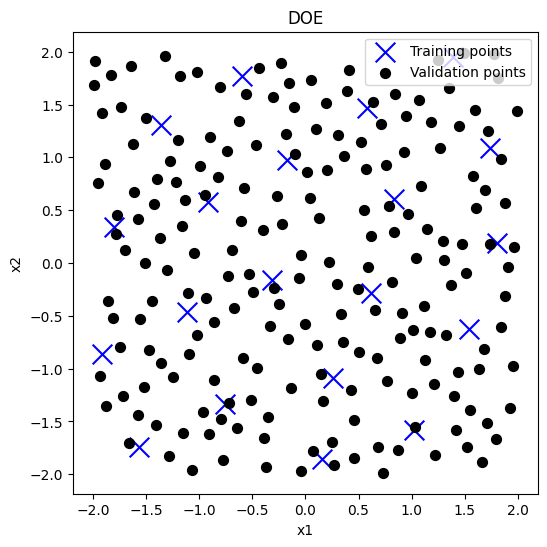

In [5]:
#To visualize the DOE points
fig = plt.figure(figsize=(6, 6))
plt.scatter(xt[:,0],xt[:,1],marker = 'x',c='b',s=200,label='Training points')
plt.scatter(xtest[:,0],xtest[:,1],marker = '.',c='k', s=200, label='Validation points')
plt.title('DOE')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

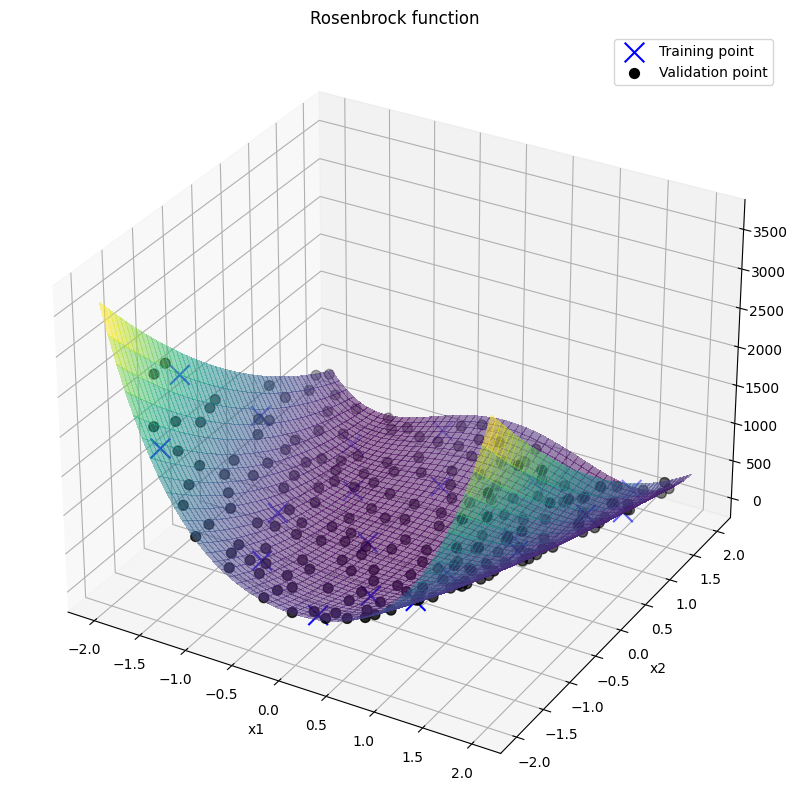

In [7]:
# To plot the Rosenbrock function
x = np.linspace(-2,2,50)
res = []
for x0 in x:
    for x1 in x:
        res.append(fun(np.array([[x0,x1]])))
res = np.array(res)
res = res.reshape((50,50)).T
X,Y = np.meshgrid(x,x)
fig = plt.figure(figsize=(15, 10))
ax =  fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, res, cmap=cm.viridis,
                       linewidth=0, antialiased=False,alpha=0.5)

ax.scatter(xt[:,0],xt[:,1],yt,zdir='z',marker = 'x',c='b',s=200,label='Training point')
ax.scatter(xtest[:,0],xtest[:,1],ytest,zdir='z',marker = '.',c='k',s=200,label='Validation point')

plt.title('Rosenbrock function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Kriging model

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 20
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1495991
Kriging,  err: 0.00010220741243073199


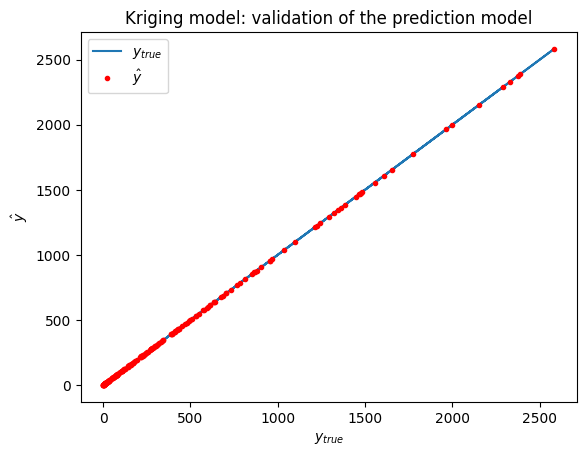

theta values [0.02424428 0.00010882]


In [8]:
########### The Kriging model

# The variable 'theta0' is a list of length ndim.
t = KRG(theta0=[1e-2]*ndim,print_prediction = False)
t.set_training_values(xt,yt[:,0])

t.train()

# Prediction of the validation points
y = t.predict_values(xtest)
print('Kriging,  err: '+ str(compute_rms_error(t,xtest,ytest)))
if plot_status:
    
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
    fig = plt.figure()
    plt.plot(ytest, ytest, '-', label='$y_{true}$')
    plt.plot(ytest, y, 'r.', label='$\hat{y}$')
   
    plt.xlabel('$y_{true}$')
    plt.ylabel('$\hat{y}$')
    
    plt.legend(loc='upper left')
    plt.title('Kriging model: validation of the prediction model')   

if plot_status:
    plt.show()

# Value of theta
print("theta values",  t.optimal_theta)

In [3]:
import pandas as pd

In [13]:
xt_df = pd.DataFrame(xt, columns = ['x1', 'x2'])
xt_df.head()

,x1,x2
0,1.538375,-0.624377
1,1.737300,1.084222
2,0.617009,-0.288262
3,-0.916161,0.578921
4,-0.171923,0.975629


In [14]:
t = KRG(theta0=[1e-2]*ndim,print_prediction = False)
t.set_training_values(xt_df,yt[:,0])

t.train()

ValueError: xt must be a NumPy array